## Base de Dados

A base de dados escolhida foi a base **Smoking and Drinking Dataset with body signal**. Ela está disponível para consulta e download na plataforma **Kaggle**, clicando [aqui](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset).

### Sobre a Base de Dados

Segundo a própria plataforma, a base escolhida é definida da seguinte forma:

> Este conjunto de dados foi coletado do Serviço Nacional de Seguro de Saúde na Coréia do Sul. Todas as informações pessoais e dados sensíveis foram excluídos.
>
> O objetivo deste conjunto de dados é:
>
>1. Análise de sinais corporais
>2. Classificação de fumantes ou consumidores de álcool

## Importar as Bibliotecas

Importar as biliotecas que usaremos no tratamento inicial de dados do trabalho.

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import yellowbrick as yb

base = pd.read_csv('./smoking_drinking_dataset.csv')

_Visualização da base:_

In [270]:
base

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


_Visualização da distribuição de consumidores de bebidas alcóolicas e não consumidores:_

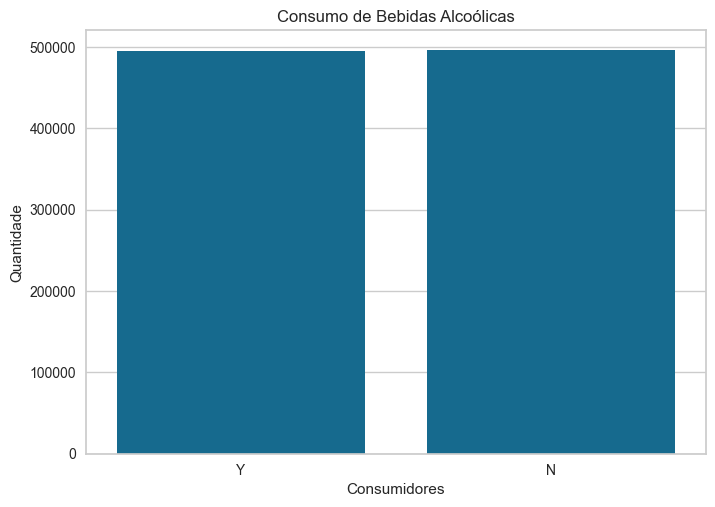

In [271]:
# Gerar o gráfico de barras
ax = sns.countplot(x=base['DRK_YN'])

# Renomear os eixos
ax.set_xlabel('Consumidores')
ax.set_ylabel('Quantidade')

# Adicionar um título para o gráfico
ax.set_title('Consumo de Bebidas Alcoólicas')

# Exibir o gráfico
plt.show()

_Visualização da distribuição de categorias de fumantes:_

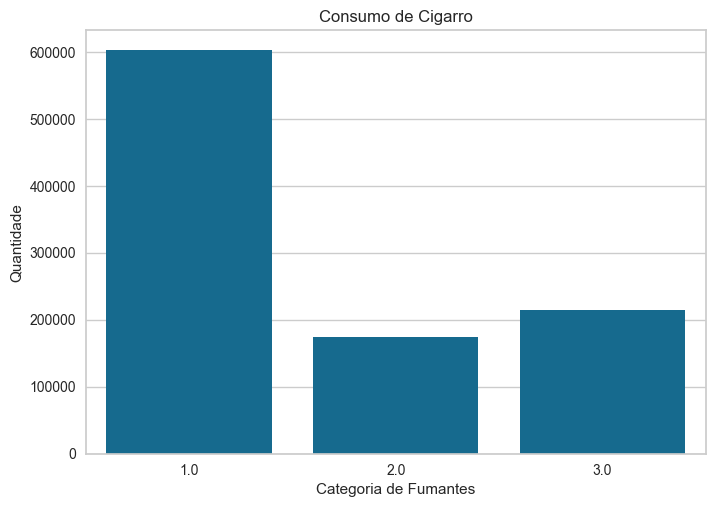

In [272]:
# Gerar o gráfico de barras
ax = sns.countplot(x=base['SMK_stat_type_cd'])

# Renomear os eixos
ax.set_xlabel('Categoria de Fumantes')
ax.set_ylabel('Quantidade')

# Adicionar um título para o gráfico
ax.set_title('Consumo de Cigarro')

# Exibir o gráfico
plt.show()

## Limpeza da Base de Dados

É necessário tratar os dados ausentes existentes na base de dados, para que os algoritmos em _Python_ possam funcionar:

In [273]:
# Verificar a quantidade de dados ausentes em cada coluna
dados_ausentes = base.isnull().sum()

# Exibir a quantidade de dados ausentes em cada coluna
print("Quantidade de dados ausentes em cada coluna:")
print(dados_ausentes)

Quantidade de dados ausentes em cada coluna:
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


Como não foram detectados dados ausentes, já é possível continuar.

## Definição dos Atributos

### Atributos de Classificação

As colunas com índice _0 a 22_ serão utilizadas como atributos de classificação.

In [274]:
x_prev = base.iloc[:, 0:22]

In [275]:
x_prev

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0


_Obter os valores:_

In [276]:
x_prev = base.iloc[:, 0:22].values

_Visualização dos valores:_

In [277]:
x_prev

array([['Male', 35, 170, ..., 21.0, 35.0, 40.0],
       ['Male', 30, 180, ..., 20.0, 36.0, 27.0],
       ['Male', 40, 165, ..., 47.0, 32.0, 68.0],
       ...,
       ['Female', 40, 155, ..., 30.0, 27.0, 17.0],
       ['Male', 25, 175, ..., 21.0, 14.0, 17.0],
       ['Male', 50, 160, ..., 24.0, 43.0, 36.0]], dtype=object)

### Atributos de Classe

As duas últimas colunas são as variáveis que o modelo tentará prever, indicando em uma qual categoria a pessoa se encontra em consumo de cigarro e, na outra, se ela consome ou não bebidas alcoólicas.

In [278]:
y_classe_categoria_fumante = base.iloc[:, 22].values
y_classe_cosumidor_bebida = base.iloc[:, 23].values

In [279]:
y_classe_categoria_fumante

array([1., 3., 1., ..., 3., 1., 3.])

In [280]:
y_classe_cosumidor_bebida

array(['Y', 'N', 'N', ..., 'Y', 'N', 'Y'], dtype=object)

## Tratamento de Dados

### Atributos Não Ordinais

Apenas a primeira coluna da base de dados escolhida possui atributos não ordinais, pois dividiu o gênero das pessoas em _male (masculino)_ e _female (feminino)_.

Usaremos o **OneHotEncoder** para tratar esses dados.

In [281]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [282]:
label_encoder = LabelEncoder()

_Escolher a primeira coluna:_

In [283]:
onehotencoder_base = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0])], remainder='passthrough')

_Transformação dos dados:_

In [284]:
x_prev = onehotencoder_base.fit_transform(x_prev)

_Visualização dos atributos não ordinais:_

In [285]:
x_prev

array([[0.0, 1.0, 35, ..., 21.0, 35.0, 40.0],
       [0.0, 1.0, 30, ..., 20.0, 36.0, 27.0],
       [0.0, 1.0, 40, ..., 47.0, 32.0, 68.0],
       ...,
       [1.0, 0.0, 40, ..., 30.0, 27.0, 17.0],
       [0.0, 1.0, 25, ..., 21.0, 14.0, 17.0],
       [0.0, 1.0, 50, ..., 24.0, 43.0, 36.0]], dtype=object)

> O **OneHotEncoder** utiliza a ordem lexicográfica para reorganizar as colunas dos atributos não-ordinais. Dessa maneira, a coluna _female_ fica antes de _male_.
>
> Essa informação é muito importante, pois, quando geramos a árvore de decisão e renomeamos os cabeçalhos, precisamos saber qual deles vem primeiro.

### Método de Amostragem Holdout

Vamos utilizar o método de amostragem _Holdout_ para divisão dos conjuntos de treinamento e teste.

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
y_classe_categoria_fumante.shape

(991346,)

In [288]:
y_classe_cosumidor_bebida.shape

(991346,)

Definimos a proporção da seguinte forma:
- 80%: Tamanho do conjunto de treinamento.
- 20%: Tamanho do conjunto de testes.

In [289]:
x_treino_cigarro, x_teste_cigarro, y_treino_cigarro, y_teste_cigarro = train_test_split(x_prev, y_classe_categoria_fumante, test_size = 0.20, random_state = 23)

In [290]:
x_treino_bebida, x_teste_bebida, y_treino_bebida, y_teste_bebida = train_test_split(x_prev, y_classe_cosumidor_bebida, test_size = 0.20, random_state = 23)

## Algoritmos

Agora, vamos mostrar quais algoritmos utilizamos para realizar o treinamento e os testes da nossa base de dados.

### Árvore de Decisão

O primeiro algoritmo escolhido foi o da _Árvore de Decisão_.

In [291]:
from sklearn.tree import DecisionTreeClassifier

**Primeiro Teste: Categoria de Fumantes**

In [292]:
modelo = DecisionTreeClassifier(criterion='entropy')
C = modelo.fit(x_treino_cigarro, y_treino_cigarro)

In [293]:
previsoes_cigarro = modelo.predict(x_teste_cigarro)

In [294]:
y_teste_cigarro

array([3., 1., 3., ..., 1., 1., 1.])

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _Árvore de Decisão_ na categoria **Fumantes**.

In [295]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_cigarro, previsoes_cigarro)

0.6225702325112221

In [296]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_cigarro, previsoes_cigarro)

array([[93741, 12406, 14142],
       [12036, 11893, 10905],
       [13786, 11558, 17803]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de fumantes:_

0.6225702325112221

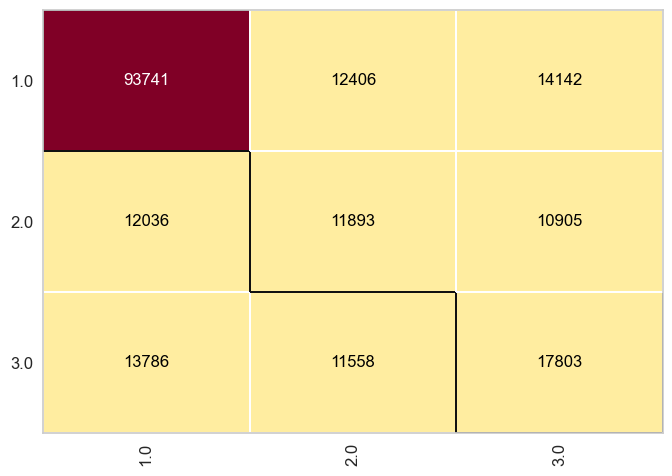

In [297]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino_cigarro, y_treino_cigarro)
cm.score(x_teste_cigarro, y_teste_cigarro)

In [298]:
print(classification_report(y_teste_cigarro, previsoes_cigarro))

              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78    120289
         2.0       0.33      0.34      0.34     34834
         3.0       0.42      0.41      0.41     43147

    accuracy                           0.62    198270
   macro avg       0.51      0.51      0.51    198270
weighted avg       0.62      0.62      0.62    198270



**Visualização da Árvore de Decisão: Categoria de Fumantes**

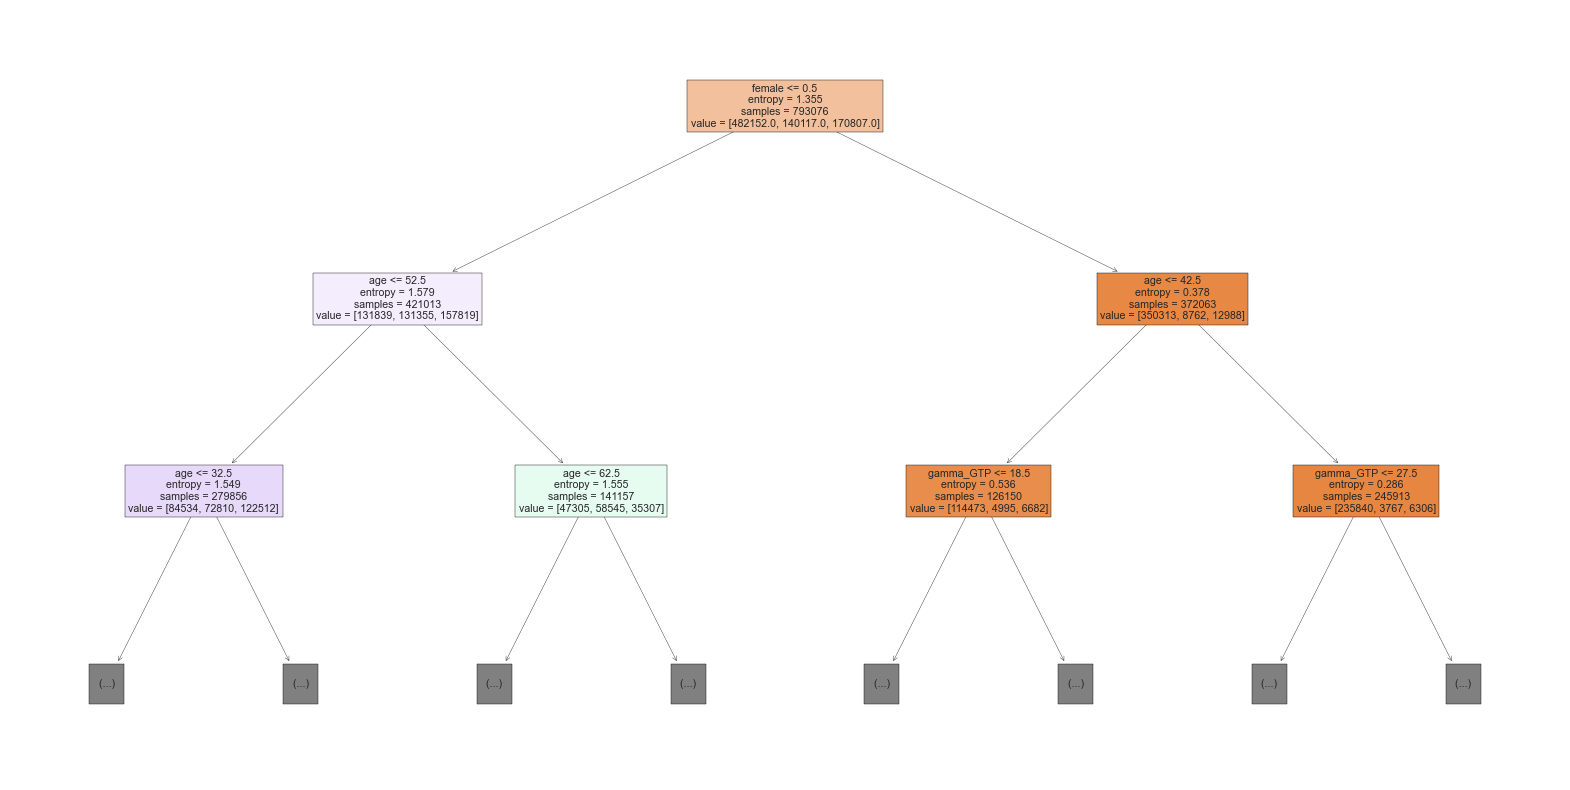

In [299]:
from sklearn import tree
feature_names = ['female', 'male', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 
                 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 
                 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
plt.figure(figsize=(20, 10))
tree.plot_tree(C, feature_names=feature_names, max_depth=2, filled=True)
plt.show()

**Segundo Teste: Consumidores de Bebidas Alcoólicas**

In [300]:
modelo = DecisionTreeClassifier(criterion='entropy')
B = modelo.fit(x_treino_bebida, y_treino_bebida)

In [301]:
previsoes_bebida = modelo.predict(x_teste_bebida)

In [302]:
y_treino_bebida

array(['N', 'Y', 'N', ..., 'N', 'Y', 'Y'], dtype=object)

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _Árvore de Decisão_ na categoria **Bebidas Alcoólicas**.

In [303]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_bebida, previsoes_bebida)

0.6439350380793867

In [304]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_bebida, previsoes_bebida)

array([[63766, 35117],
       [35480, 63907]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de consumidores de bebidas alcoólicas:_

0.6439350380793867

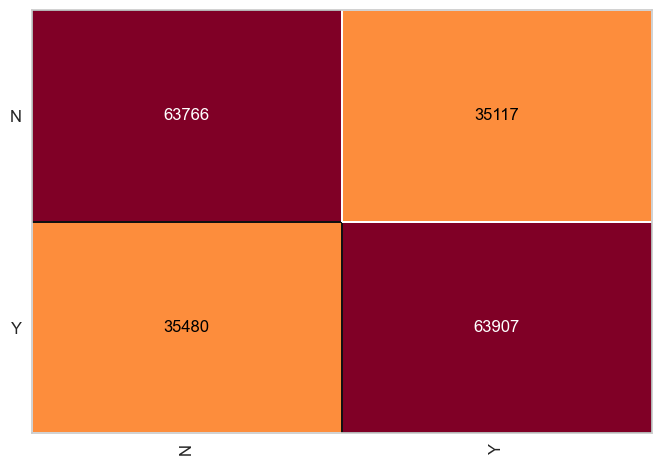

In [305]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino_cigarro, y_treino_bebida)
cm.score(x_teste_bebida, y_teste_bebida)

In [306]:
print(classification_report(y_teste_bebida, previsoes_bebida))

              precision    recall  f1-score   support

           N       0.64      0.64      0.64     98883
           Y       0.65      0.64      0.64     99387

    accuracy                           0.64    198270
   macro avg       0.64      0.64      0.64    198270
weighted avg       0.64      0.64      0.64    198270



**Visualização da Árvore de Decisão: Consumidores de Bebidas Alcoólicas**

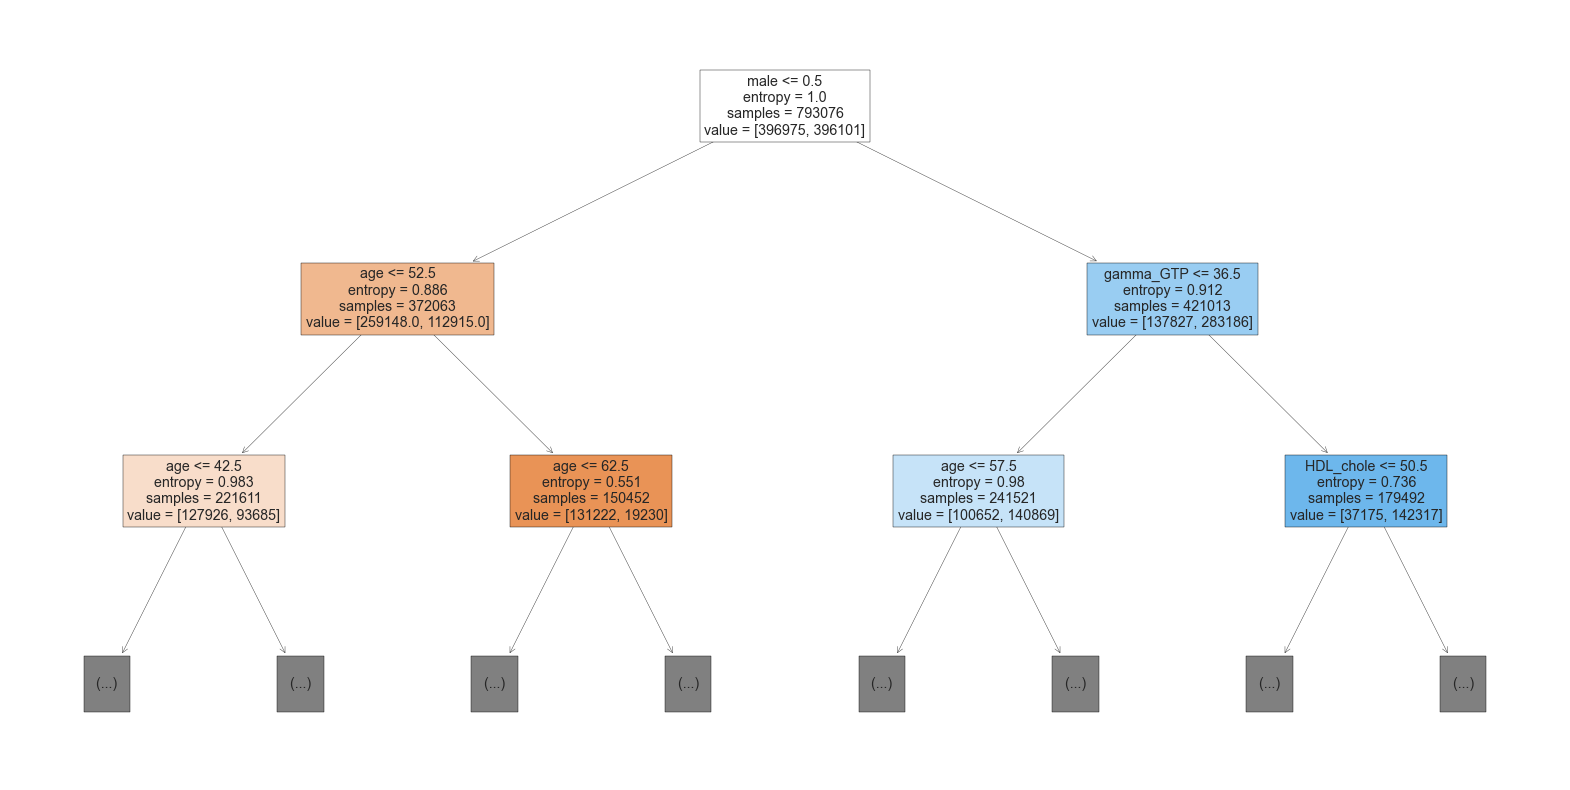

In [307]:
from sklearn import tree
feature_names = ['female', 'male', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 
                 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 
                 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
plt.figure(figsize=(20, 10))
tree.plot_tree(B, feature_names=feature_names, max_depth=2, filled=True)
plt.show()

**Salvamento dos Dados**

In [308]:
import pickle 
with open('./treino_bebida.pkl', mode = 'wb') as b:
  pickle.dump([x_treino_bebida, x_teste_bebida, y_treino_bebida, y_teste_bebida], b)
with open('./treino_cigarro.pkl', mode = 'wb') as c:
  pickle.dump([x_treino_cigarro, x_teste_cigarro, y_treino_cigarro, y_teste_cigarro], c)

### Random Forest

O segundo algoritmo escolhido foi o _Random Forest_.

**Primeiro Teste: Consumidores de Bebidas Alcoólicas**

In [309]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
import pickle
with open('./treino_bebida.pkl', 'rb') as b:
  X_treino_rf_bebida, X_teste_rf_bebida, y_treino_rf_bebida, y_teste_rf_bebida = pickle.load(b)

In [311]:
modelo_rf_bebida = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
modelo_rf_bebida.fit(X_treino_rf_bebida, y_treino_rf_bebida)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)

In [312]:
previsoes_rf_bebida = modelo_rf_bebida.predict(X_teste_rf_bebida)

In [313]:
previsoes_rf_bebida

array(['Y', 'N', 'Y', ..., 'N', 'Y', 'N'], dtype=object)

In [314]:
y_teste_rf_bebida

array(['Y', 'N', 'N', ..., 'N', 'Y', 'N'], dtype=object)

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _Random Forest_ na categoria **Bebidas Alcoólicas**.

In [315]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_rf_bebida,previsoes_rf_bebida)

0.7000907852927826

In [316]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_rf_bebida, previsoes_rf_bebida)

array([[74236, 24647],
       [34816, 64571]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de consumidores de bebidas alcoólicas:_

0.7000907852927826

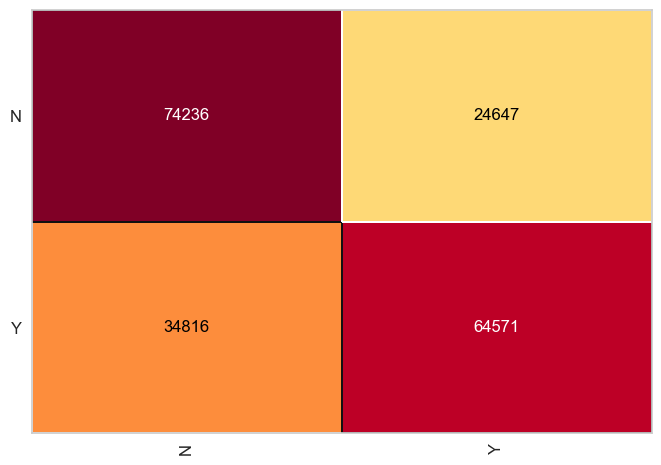

In [317]:
cm = ConfusionMatrix(modelo_rf_bebida)
cm.fit(X_treino_rf_bebida, y_treino_rf_bebida)
cm.score(X_teste_rf_bebida, y_teste_rf_bebida)

In [318]:
print(classification_report(y_teste_rf_bebida, previsoes_rf_bebida))

              precision    recall  f1-score   support

           N       0.68      0.75      0.71     98883
           Y       0.72      0.65      0.68     99387

    accuracy                           0.70    198270
   macro avg       0.70      0.70      0.70    198270
weighted avg       0.70      0.70      0.70    198270



Visualizando quais atributos o Random Forest considerou mais importante na base de bebidas alcoólicas:

In [319]:
print(modelo_rf_bebida.feature_importances_) 

[0.0330904  0.03618257 0.06648786 0.06444015 0.03204335 0.05295683
 0.03301425 0.03252895 0.00205246 0.00206725 0.04724018 0.04511099
 0.05096817 0.05327833 0.06159677 0.05466568 0.05787744 0.06094315
 0.00544427 0.03040745 0.04476185 0.05145789 0.08138377]


**Distribuição da classe de acordo com a idade:**

Cabe notar que poderíamos usar qualquer outra coluna nessa análise, bastando alterar o nome da coluna desejada no eixo Y.

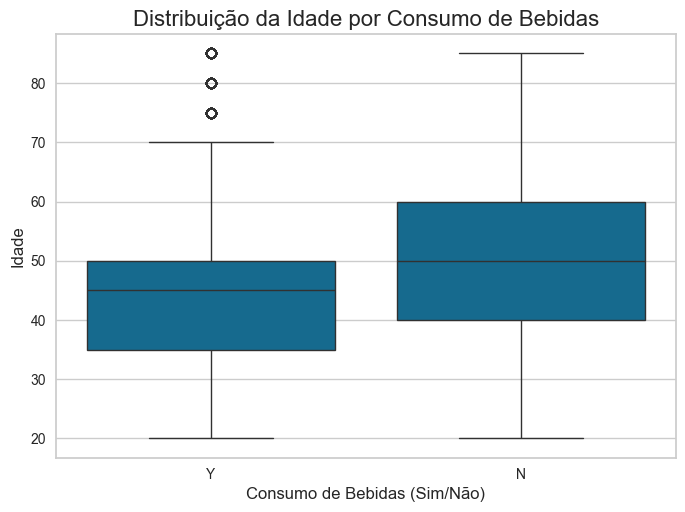

In [320]:
sns.boxplot(data=base,x="DRK_YN", y="age")

# Adicionar título ao gráfico
plt.title('Distribuição da Idade por Consumo de Bebidas', fontsize=16)

# Adicionar título ao eixo x
plt.xlabel('Consumo de Bebidas (Sim/Não)', fontsize=12)

# Adicionar título ao eixo y
plt.ylabel('Idade', fontsize=12)

# Exibir o gráfico
plt.show()

**Segundo Teste: Categorias de Fumantes**

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
import pickle
with open('./treino_cigarro.pkl', 'rb') as c:
  X_treino_rf_cigarro, X_teste_rf_cigarro, y_treino_rf_cigarro, y_teste_rf_cigarro = pickle.load(c)

In [323]:
modelo_rf_cigarro = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
modelo_rf_cigarro.fit(X_treino_rf_cigarro, y_treino_rf_cigarro)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)

In [324]:
previsoes_rf_cigarro = modelo_rf_cigarro.predict(X_teste_rf_cigarro)

In [325]:
previsoes_rf_cigarro

array([1., 1., 1., ..., 1., 1., 1.])

In [326]:
y_teste_rf_cigarro

array([3., 1., 3., ..., 1., 1., 1.])

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _Random Forest_ na categoria **Fumantes**.

In [327]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_rf_cigarro,previsoes_rf_cigarro)

0.6674282544005649

In [328]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_rf_cigarro, previsoes_rf_cigarro)

array([[101060,   9243,   9986],
       [ 12745,  11992,  10097],
       [ 14120,   9748,  19279]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de fumantes:_

0.6674282544005649

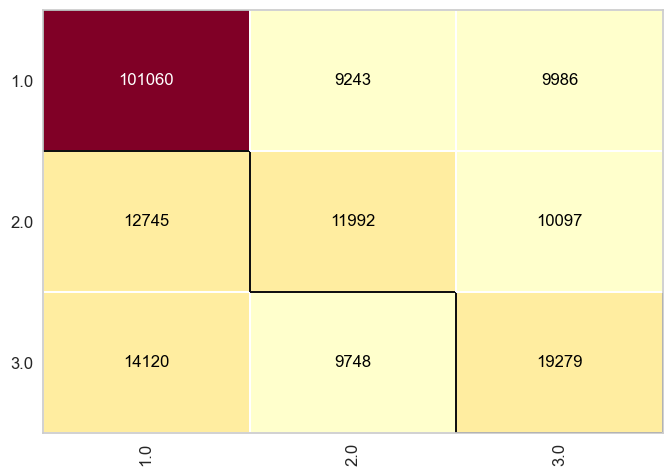

In [329]:
cm = ConfusionMatrix(modelo_rf_cigarro)
cm.fit(X_treino_rf_cigarro, y_treino_rf_cigarro)
cm.score(X_teste_rf_cigarro, y_teste_rf_cigarro)

In [330]:
print(classification_report(y_teste_rf_cigarro, previsoes_rf_cigarro))

              precision    recall  f1-score   support

         1.0       0.79      0.84      0.81    120289
         2.0       0.39      0.34      0.36     34834
         3.0       0.49      0.45      0.47     43147

    accuracy                           0.67    198270
   macro avg       0.56      0.54      0.55    198270
weighted avg       0.65      0.67      0.66    198270



Visualizando quais atributos o Random Forest considerou mais importante na base categorias de fumante:

In [331]:
print(modelo_rf_cigarro.feature_importances_) 

[0.06310855 0.0846946  0.04085205 0.07930186 0.03053599 0.06283734
 0.02928295 0.02912088 0.0019614  0.0018449  0.04309323 0.04151071
 0.04659087 0.04846401 0.04580603 0.04833892 0.05466152 0.06170477
 0.00509246 0.03460827 0.04268227 0.04599215 0.05791428]


**Distribuição da classe de acordo com a idade:**

Cabe notar que poderíamos usar qualquer outra coluna nessa análise, bastando alterar o nome da coluna desejada no eixo Y.

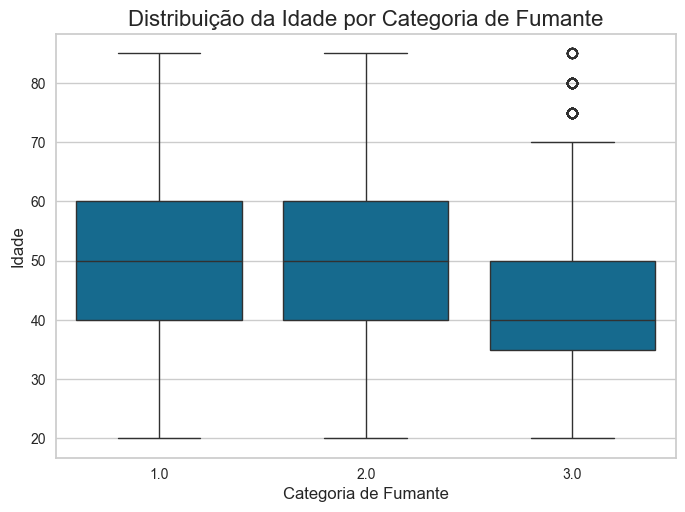

In [332]:
sns.boxplot(data=base,x="SMK_stat_type_cd", y="age")

# Adicionar título ao gráfico
plt.title('Distribuição da Idade por Categoria de Fumante', fontsize=16)

# Adicionar título ao eixo x
plt.xlabel('Categoria de Fumante', fontsize=12)

# Adicionar título ao eixo y
plt.ylabel('Idade', fontsize=12)

# Exibir o gráfico
plt.show()

**Visualização do _Boxplot_ dos atributos de acordo com a quantidade:**

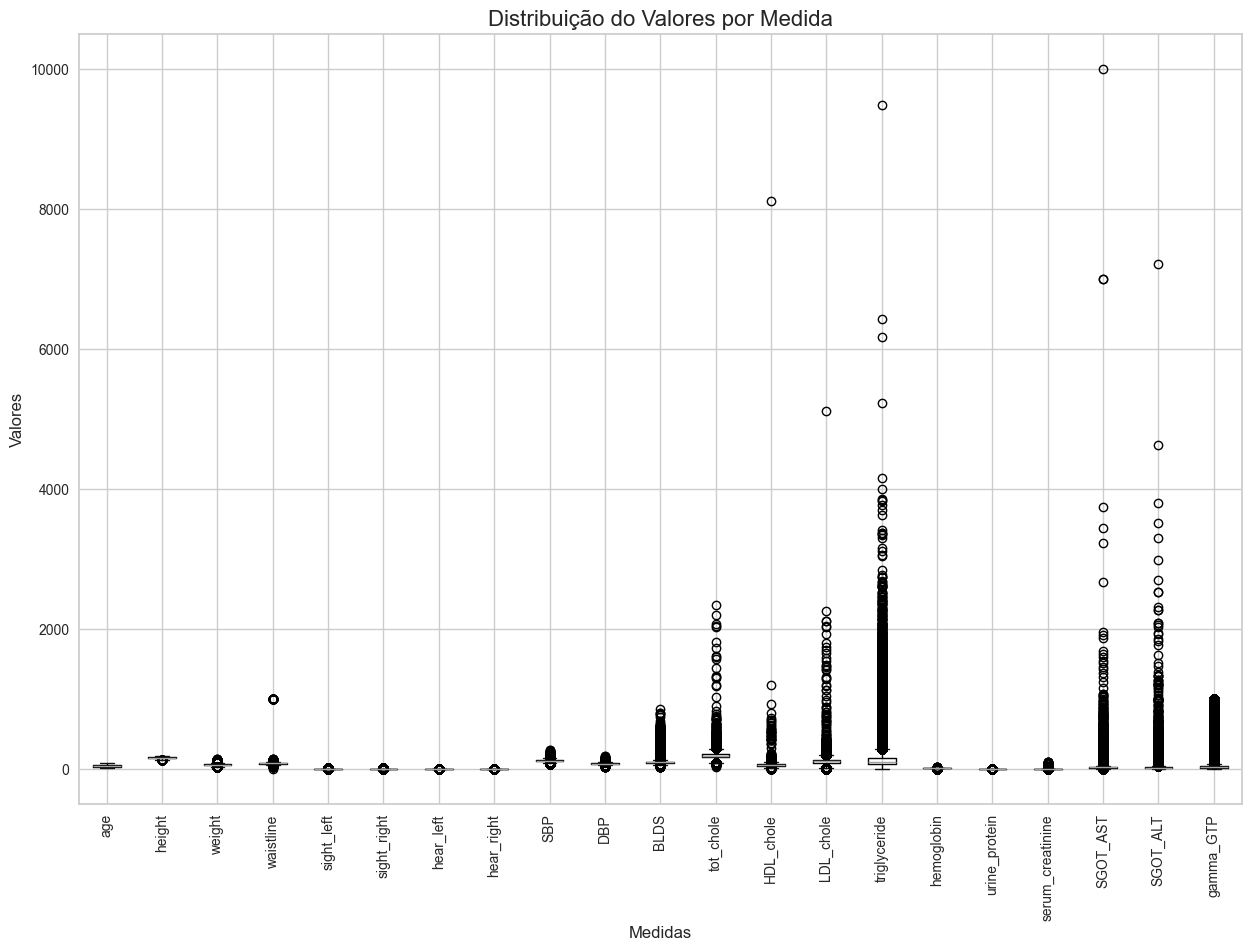

In [333]:
import matplotlib.pyplot as plt

# Definir o tamanho da figura com figsize
plt.figure(figsize=(15, 10))

# Gerar o boxplot
base.boxplot(column=[
    'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
    'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
])

# Adicionar título ao gráfico
plt.title('Distribuição do Valores por Medida', fontsize=16)

# Adicionar título ao eixo x
plt.xlabel('Medidas', fontsize=12)

# Adicionar título ao eixo y
plt.ylabel('Valores', fontsize=12)

# Exibir o gráfico
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para 90 graus
plt.show()

### Naive-Bayes

O terceiro algoritmo escolhido foi o _Naive-Bayes_.

**Primeiro Teste: Consumidores de Bebidas Alcoólicas**

In [334]:
from sklearn.naive_bayes import GaussianNB

In [335]:
import pickle
with open('./treino_bebida.pkl', 'rb') as g:
  x_treino_bebida, x_teste_bebida, y_treino_bebida, y_teste_bebida = pickle.load(g)

In [336]:
modelo_nb_bebida = GaussianNB()

In [337]:
modelo_nb_bebida.fit(x_treino_bebida, y_treino_bebida)

GaussianNB()

In [338]:
previsoes_nb_bebida = modelo_nb_bebida.predict(x_teste_bebida)

In [339]:
previsoes_nb_bebida

array(['Y', 'N', 'Y', ..., 'N', 'N', 'N'], dtype='<U1')

In [340]:
y_teste_bebida

array(['Y', 'N', 'N', ..., 'N', 'Y', 'N'], dtype=object)

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _Naive-Bayes_ na categoria **Bebidas Alcoólicas**.

In [341]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_bebida,previsoes_nb_bebida)

0.6851112119836587

In [342]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_bebida, previsoes_nb_bebida)

array([[67650, 31233],
       [31200, 68187]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de consumidores de bebidas alcoólicas:_

0.6851112119836587

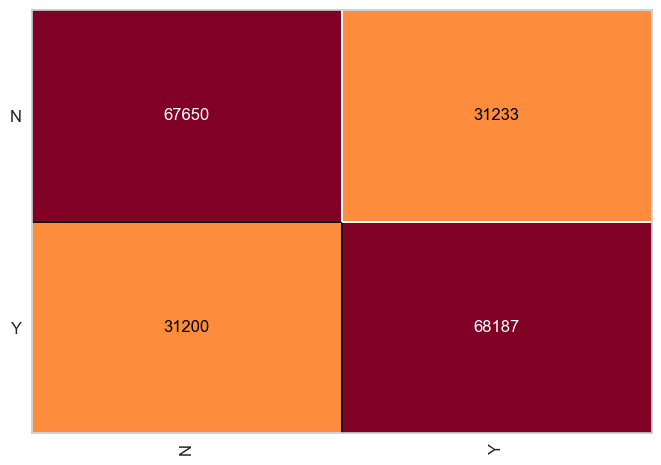

In [343]:
cm = ConfusionMatrix(modelo_nb_bebida)
cm.fit(x_treino_bebida, y_treino_bebida)
cm.score(x_teste_bebida, y_teste_bebida)

In [344]:
print(classification_report(y_teste_bebida, previsoes_nb_bebida))

              precision    recall  f1-score   support

           N       0.68      0.68      0.68     98883
           Y       0.69      0.69      0.69     99387

    accuracy                           0.69    198270
   macro avg       0.69      0.69      0.69    198270
weighted avg       0.69      0.69      0.69    198270



**Segundo Teste: Categorias de Fumantes**

In [345]:
import pickle
with open('./treino_cigarro.pkl', 'rb') as h:
  x_treino_cigarro, x_teste_cigarro, y_treino_cigarro, y_teste_cigarro = pickle.load(h)

In [346]:
modelo_nb_cigarro = GaussianNB()

In [347]:
modelo_nb_cigarro.fit(x_treino_cigarro, y_treino_cigarro)

GaussianNB()

In [348]:
previsoes_nb_cigarro = modelo_nb_cigarro.predict(x_teste_cigarro)

In [349]:
previsoes_nb_cigarro

array([3., 1., 3., ..., 1., 1., 1.])

In [350]:
y_teste_cigarro

array([3., 1., 3., ..., 1., 1., 1.])

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _Naive-Bayes_ na categoria **Fumantes**.

In [351]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_cigarro,previsoes_nb_cigarro)

0.6633580471074797

In [352]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_cigarro, previsoes_nb_cigarro)

array([[88677, 16837, 14775],
       [ 3465, 20929, 10440],
       [ 4596, 16633, 21918]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de consumidores de fumantes:_

0.6633580471074797

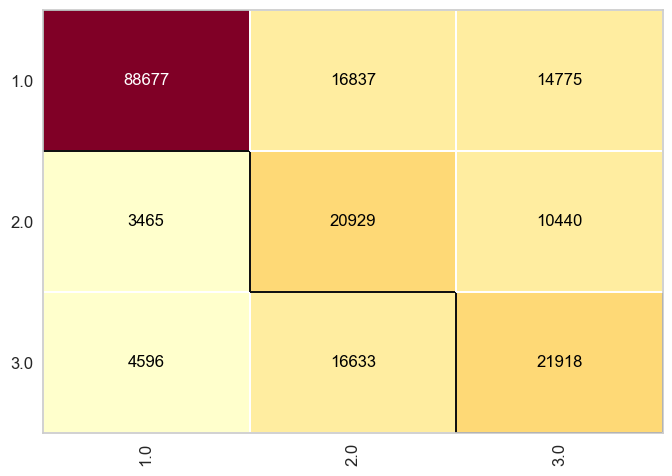

In [353]:
cm = ConfusionMatrix(modelo_nb_cigarro)
cm.fit(x_treino_cigarro, y_treino_cigarro)
cm.score(x_teste_cigarro, y_teste_cigarro)

In [354]:
print(classification_report(y_teste_cigarro, previsoes_nb_cigarro))

              precision    recall  f1-score   support

         1.0       0.92      0.74      0.82    120289
         2.0       0.38      0.60      0.47     34834
         3.0       0.47      0.51      0.49     43147

    accuracy                           0.66    198270
   macro avg       0.59      0.62      0.59    198270
weighted avg       0.72      0.66      0.68    198270



### Rede Neural Artificial (RNA)

O quarto algoritmo escolhido foi o _RNA_.

In [355]:
from sklearn.neural_network import MLPClassifier

**Primeiro Teste: Consumidores de Bebidas Alcoólicas**

In [356]:
with open('./treino_bebida.pkl', mode = 'wb') as f:
  pickle.dump([x_treino_bebida, x_teste_bebida, y_treino_bebida, y_teste_bebida], f)

In [357]:
modelo_rna_bebida = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo_rna_bebida.fit(x_treino_bebida, y_treino_bebida)

Iteration 1, loss = 1.05174933
Iteration 2, loss = 0.55655513
Iteration 3, loss = 0.55423723
Iteration 4, loss = 0.55220225
Iteration 5, loss = 0.55084888
Iteration 6, loss = 0.54974776
Iteration 7, loss = 0.54842630
Iteration 8, loss = 0.54798169
Iteration 9, loss = 0.54687949
Iteration 10, loss = 0.54540312
Iteration 11, loss = 0.54526092
Iteration 12, loss = 0.54414884
Iteration 13, loss = 0.54332106
Iteration 14, loss = 0.54208539
Iteration 15, loss = 0.54186548
Iteration 16, loss = 0.53951297
Iteration 17, loss = 0.53766513
Iteration 18, loss = 0.53736895
Iteration 19, loss = 0.53660556
Iteration 20, loss = 0.53583920
Iteration 21, loss = 0.53569325
Iteration 22, loss = 0.53509778
Iteration 23, loss = 0.53470544
Iteration 24, loss = 0.53417718
Iteration 25, loss = 0.53370184
Iteration 26, loss = 0.53312002
Iteration 27, loss = 0.53299678
Iteration 28, loss = 0.53277956
Iteration 29, loss = 0.53251539
Iteration 30, loss = 0.53215813
Iteration 31, loss = 0.53223349
Iteration 32, los

MLPClassifier(hidden_layer_sizes=9, max_iter=1000, tol=1e-14, verbose=True)

In [358]:
previsoes_rna_bebida = modelo_rna_bebida.predict(x_teste_bebida)

In [359]:
previsoes_rna_bebida

array(['Y', 'Y', 'Y', ..., 'N', 'N', 'N'], dtype='<U1')

In [360]:
y_teste_bebida

array(['Y', 'N', 'N', ..., 'N', 'Y', 'N'], dtype=object)

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _RNA_ na categoria **Bebidas Alcoólicas**.

In [361]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_bebida,previsoes_rna_bebida)

0.7320472083522469

In [362]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_bebida, previsoes_rna_bebida)

array([[71483, 27400],
       [25727, 73660]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de consumidores de bebidas alcoólicas:_

0.7320472083522469

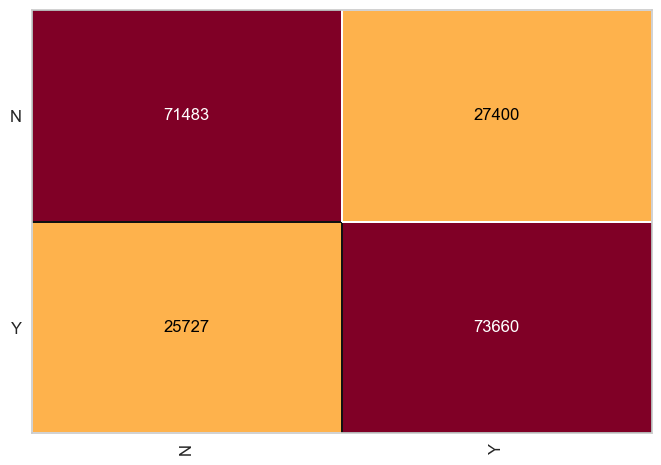

In [363]:
cm = ConfusionMatrix(modelo_rna_bebida)
cm.fit(x_treino_bebida, y_treino_bebida)
cm.score(x_teste_bebida, y_teste_bebida)

In [364]:
print(classification_report(y_teste_bebida, previsoes_rna_bebida))

              precision    recall  f1-score   support

           N       0.74      0.72      0.73     98883
           Y       0.73      0.74      0.73     99387

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270



**Visualização da Curva de Perdas:**

Mostra como a perda evolui ao longo do treinamento, ajudando a identificar problemas como overfitting.

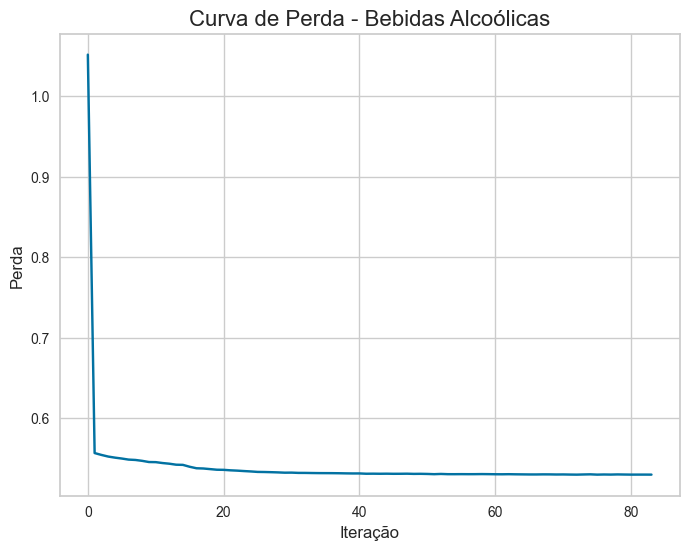

In [365]:
plt.figure(figsize=(8, 6))
plt.plot(modelo_rna_bebida.loss_curve_)
plt.xlabel('Iteração', fontsize=12)
plt.ylabel('Perda', fontsize=12)
plt.title('Curva de Perda - Bebidas Alcoólicas', fontsize=16)
plt.show()

**Segundo Teste: Categorias de Fumantes**

In [366]:
with open('./treino_cigarro.pkl', mode = 'wb') as g:
  pickle.dump([x_treino_cigarro, x_teste_cigarro, y_treino_cigarro, y_teste_cigarro], g)

In [367]:
modelo_rna_cigarro = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo_rna_cigarro.fit(x_treino_cigarro, y_treino_cigarro)

Iteration 1, loss = 1.33976134
Iteration 2, loss = 0.71179934
Iteration 3, loss = 0.69970035
Iteration 4, loss = 0.69619585
Iteration 5, loss = 0.69603859
Iteration 6, loss = 0.69373368
Iteration 7, loss = 0.69344504
Iteration 8, loss = 0.69283001
Iteration 9, loss = 0.69164446
Iteration 10, loss = 0.69336417
Iteration 11, loss = 0.69048002
Iteration 12, loss = 0.68978236
Iteration 13, loss = 0.69063267
Iteration 14, loss = 0.68956993
Iteration 15, loss = 0.68929435
Iteration 16, loss = 0.68821401
Iteration 17, loss = 0.68730485
Iteration 18, loss = 0.68708151
Iteration 19, loss = 0.68612848
Iteration 20, loss = 0.68564219
Iteration 21, loss = 0.68416974
Iteration 22, loss = 0.68238812
Iteration 23, loss = 0.68158906
Iteration 24, loss = 0.68021006
Iteration 25, loss = 0.67924947
Iteration 26, loss = 0.67872203
Iteration 27, loss = 0.67742473
Iteration 28, loss = 0.67697608
Iteration 29, loss = 0.67525354
Iteration 30, loss = 0.67304344
Iteration 31, loss = 0.67164558
Iteration 32, los

MLPClassifier(hidden_layer_sizes=9, max_iter=1000, tol=1e-14, verbose=True)

In [368]:
previsoes_rna_cigarro = modelo_rna_cigarro.predict(x_teste_cigarro)

In [369]:
previsoes_rna_cigarro

array([1., 1., 1., ..., 1., 1., 1.])

In [370]:
y_teste_cigarro

array([3., 1., 3., ..., 1., 1., 1.])

Aqui, podemos visualizar qual foi o valor da acurácia para o algoritmo de _RNA_ na categoria **Fumantes**.

In [371]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_cigarro,previsoes_rna_cigarro)

0.694628536843698

In [372]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_cigarro, previsoes_rna_cigarro)

array([[100234,  10042,  10013],
       [  9748,  14448,  10638],
       [ 10929,   9176,  23042]], dtype=int64)

_Visualização da Matriz de Confusão para a categoria de consumidores de fumantes:_

0.694628536843698

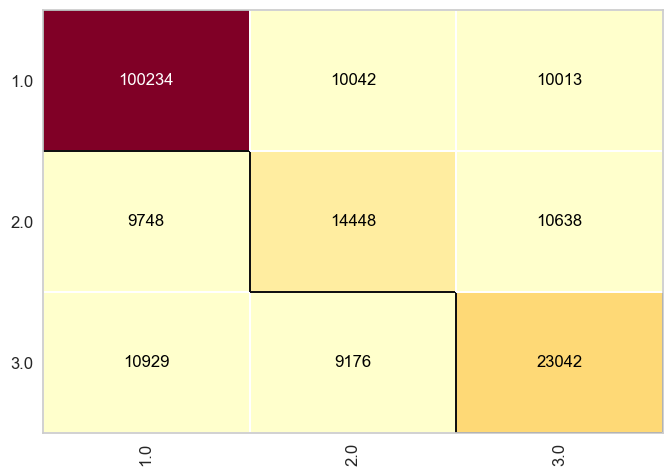

In [373]:
cm = ConfusionMatrix(modelo_rna_cigarro)
cm.fit(x_treino_cigarro, y_treino_cigarro)
cm.score(x_teste_cigarro, y_teste_cigarro)

In [374]:
print(classification_report(y_teste_cigarro, previsoes_rna_cigarro))

              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83    120289
         2.0       0.43      0.41      0.42     34834
         3.0       0.53      0.53      0.53     43147

    accuracy                           0.69    198270
   macro avg       0.60      0.59      0.59    198270
weighted avg       0.69      0.69      0.69    198270



**Visualização da Curva de Perdas:**

Mostra como a perda evolui ao longo do treinamento, ajudando a identificar problemas como overfitting.

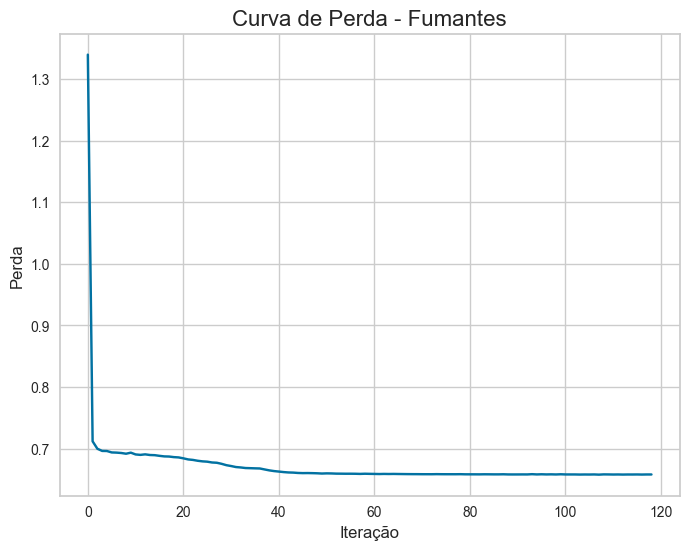

In [375]:
plt.figure(figsize=(8, 6))
plt.plot(modelo_rna_cigarro.loss_curve_)
plt.xlabel('Iteração', fontsize=12)
plt.ylabel('Perda', fontsize=12)
plt.title('Curva de Perda - Fumantes', fontsize=16)
plt.show()